# World Happiness Report 2021

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('D:/Projects/world-happiness-report-2021.csv')

In [3]:
data.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [4]:
data.isnull().sum()

Country name                                  0
Regional indicator                            0
Ladder score                                  0
Standard error of ladder score                0
upperwhisker                                  0
lowerwhisker                                  0
Logged GDP per capita                         0
Social support                                0
Healthy life expectancy                       0
Freedom to make life choices                  0
Generosity                                    0
Perceptions of corruption                     0
Ladder score in Dystopia                      0
Explained by: Log GDP per capita              0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
Dystopia + residual                           0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.shape

(149, 20)

In [7]:
data.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [8]:
data_imp_columns = ['Country name','Regional indicator','Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']

In [9]:
data = data[data_imp_columns].copy()

In [12]:
happy_df = data.rename({'Country name':'country_name','Regional indicator':'regional_indicator','Ladder score':'happiness_score','Logged GDP per capita':'logged_GDP_per_capita','Social support':'social_support','Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices','Generosity':'generosity','Perceptions of corruption':'perceptions_of_corruption'}, axis=1)

In [13]:
happy_df.head()

,country_name,regional_indicator,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


# Data Visualization

## Plot between GDP & Happiness Score  

Text(0, 0.5, 'GDP')

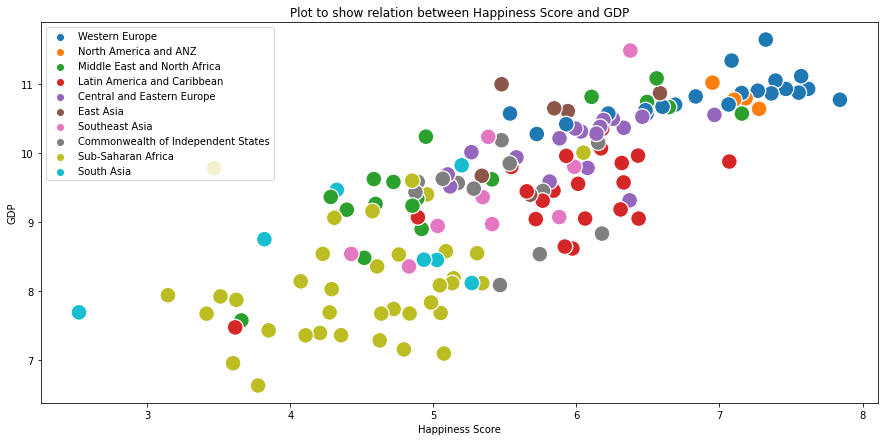

In [14]:
plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.logged_GDP_per_capita, hue=happy_df.regional_indicator, s=250)
plt.title('Plot to show relation between Happiness Score and GDP')
plt.legend(loc='upper left')
plt.xlabel('Happiness Score')
plt.ylabel('GDP')

## GDP Contribution of each region 

In [22]:
gdp_regions = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_regions

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

Text(0, 0.5, '')

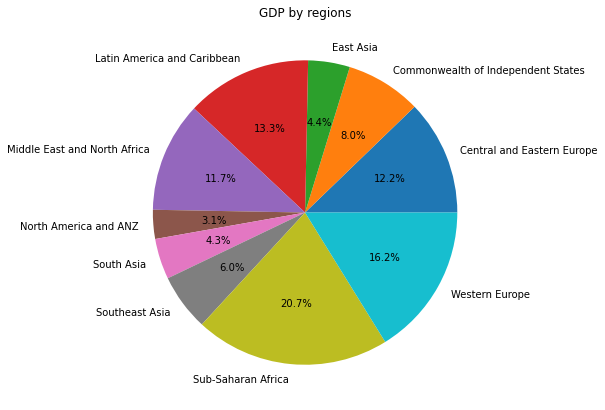

In [23]:
gdp_regions.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by regions')
plt.ylabel('')

## Correlation Heatmap

In [24]:
corr = happy_df.corr(method='pearson')
corr

,happiness_score,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption
happiness_score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
logged_GDP_per_capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
social_support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
healthy_life_expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
freedom_to_make_life_choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
perceptions_of_corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

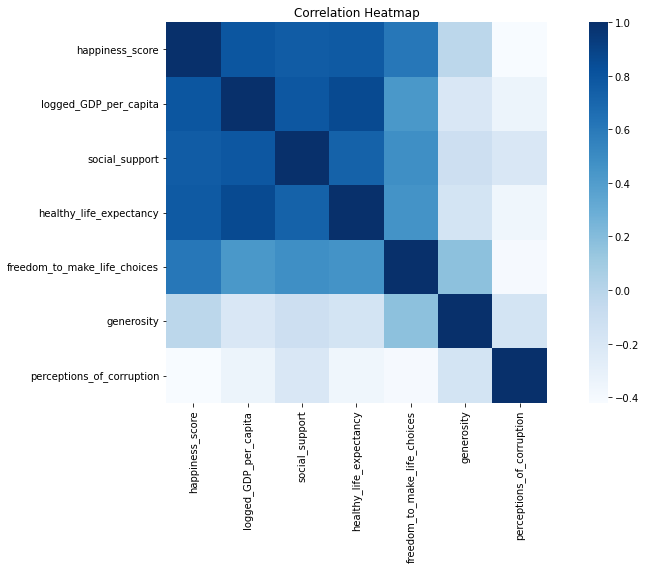

In [26]:
f, ax = plt.subplots(figsize=(15,7))
sns.heatmap(corr, square=True, vmax=1.0, cmap='Blues')
plt.title('Correlation Heatmap')

In [31]:
corruption = happy_df.groupby('regional_indicator')[['perceptions_of_corruption']].mean()
corruption

,perceptions_of_corruption
regional_indicator,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

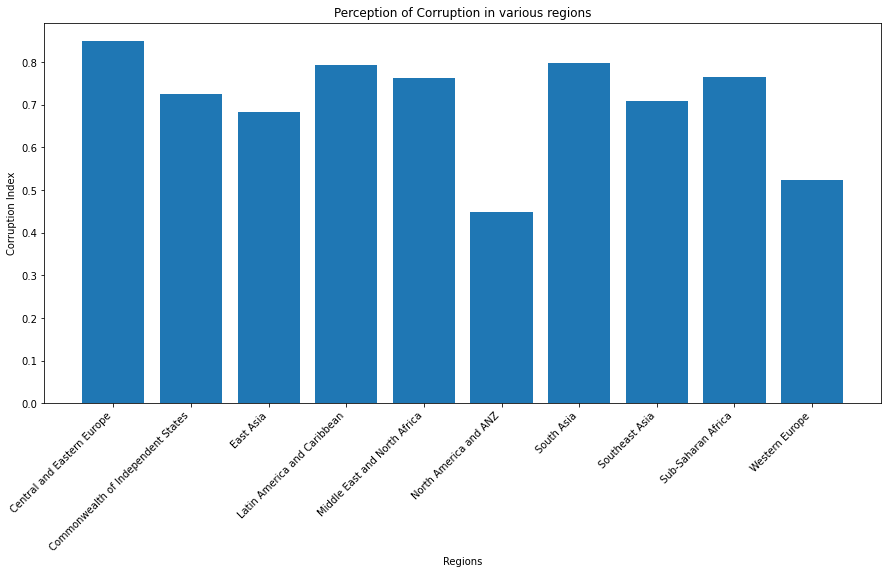

In [37]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Perception of Corruption in various regions')
plt.xlabel('Regions')
plt.ylabel('Corruption Index')
plt.xticks(rotation=45, ha= 'right')
plt.bar(corruption.index, corruption.perceptions_of_corruption)

## Effect of Happiness Score on Life Expectancy

### Life Expectancy of 10 Most Happiest Countries

In [38]:
top_10 = happy_df.head(10)

<BarContainer object of 10 artists>

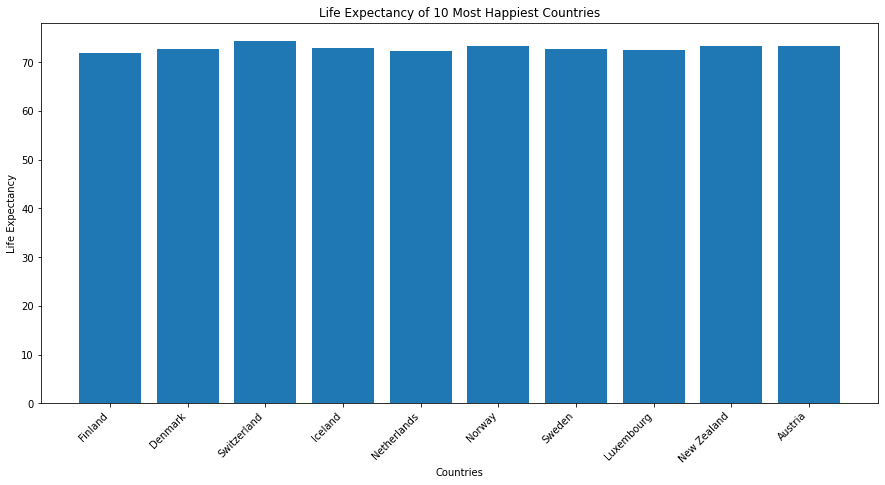

In [40]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Life Expectancy of 10 Most Happiest Countries')
plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.xticks(rotation=45, ha='right')
plt.bar(top_10.country_name, top_10.healthy_life_expectancy)

### Life Expectancy of 10 Least Happiest Countries

In [41]:
bottom_10 = happy_df.tail(10)

<BarContainer object of 10 artists>

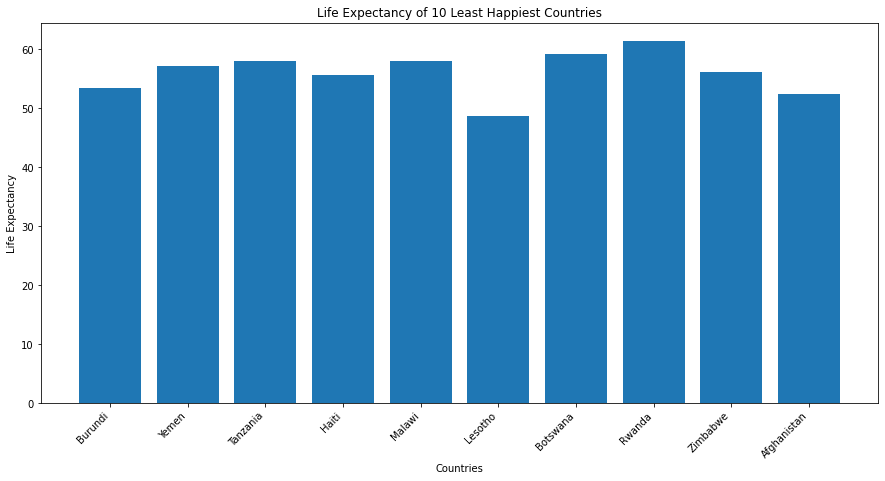

In [42]:
plt.rcParams['figure.figsize']=(15,7)
plt.title('Life Expectancy of 10 Least Happiest Countries')
plt.xlabel('Countries')
plt.ylabel('Life Expectancy')
plt.xticks(rotation =45, ha='right')
plt.bar(bottom_10.country_name, bottom_10.healthy_life_expectancy)

## Plot to show relation between Freedom to make Life Choices and Happiness Score

Text(0, 0.5, 'Freedom to make Life Choices')

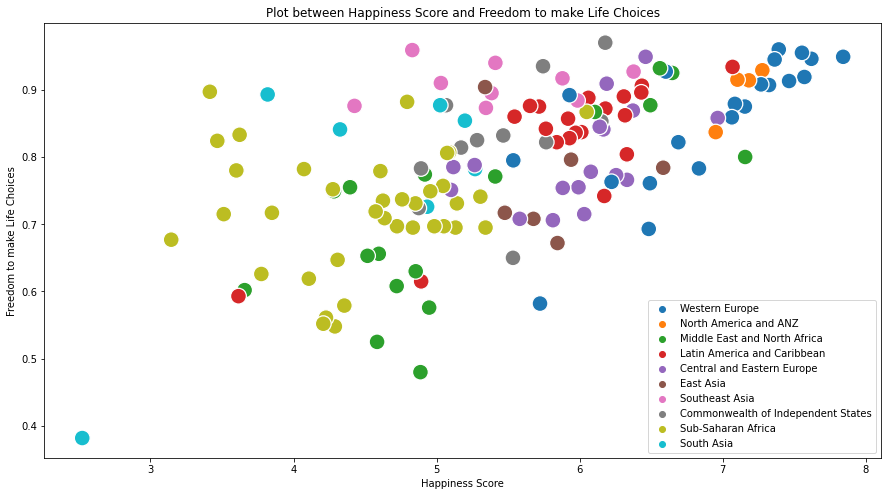

In [46]:
plt.rcParams['figure.figsize']=(15,8)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.freedom_to_make_life_choices, hue=happy_df.regional_indicator, s=250)
plt.title('Plot between Happiness Score and Freedom to make Life Choices')
plt.legend(loc='lower right')
plt.xlabel('Happiness Score')
plt.ylabel('Freedom to make Life Choices')

## Most Corrupt Countries

<BarContainer object of 10 artists>

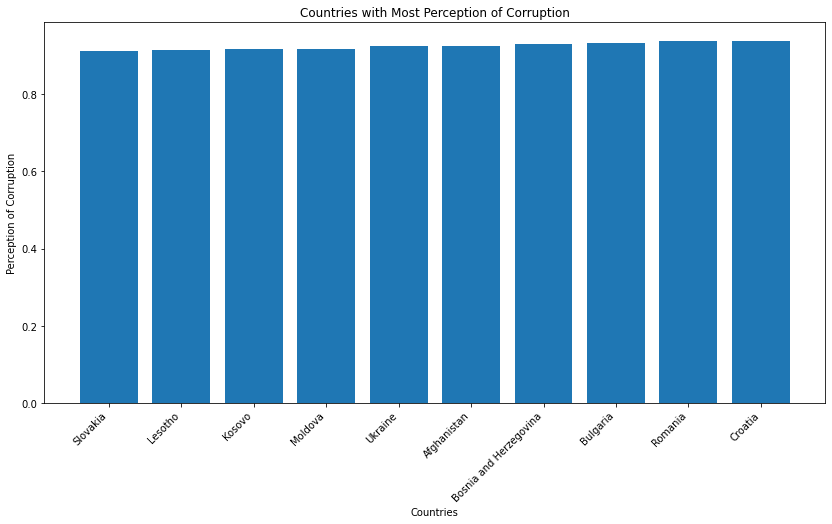

In [50]:
most_corrupt = happy_df.sort_values(by='perceptions_of_corruption').tail(10)

plt.rcParams['figure.figsize']=(14,7)
plt.title('Countries with Most Perception of Corruption')
plt.xlabel('Countries')
plt.ylabel('Perception of Corruption')
plt.xticks(rotation=45, ha='right')
plt.bar(most_corrupt.country_name, most_corrupt.perceptions_of_corruption)

## Least Corrupt Countries

<BarContainer object of 10 artists>

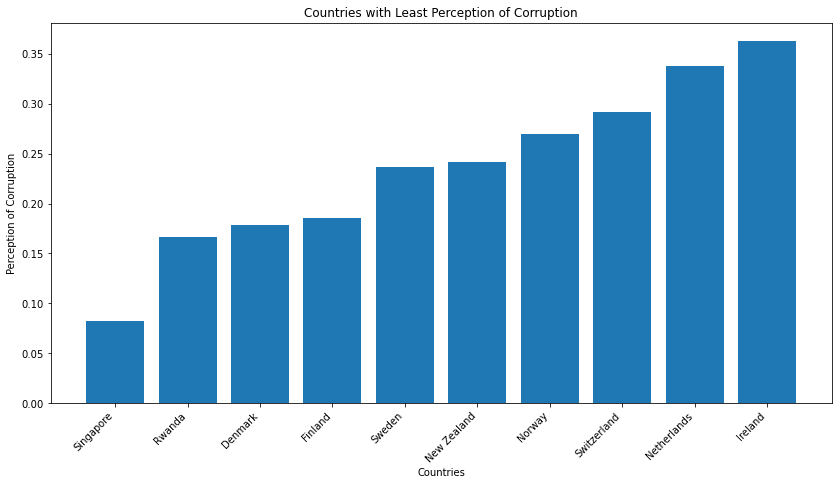

In [51]:
least_corrupt = happy_df.sort_values(by='perceptions_of_corruption').head(10)

plt.rcParams['figure.figsize']=(14,7)
plt.title('Countries with Least Perception of Corruption')
plt.xlabel('Countries')
plt.ylabel('Perception of Corruption')
plt.xticks(rotation=45, ha='right')
plt.bar(least_corrupt.country_name, least_corrupt.perceptions_of_corruption)

## Relation between Happiness Score and Corruption

Text(0, 0.5, 'Corruption Index')

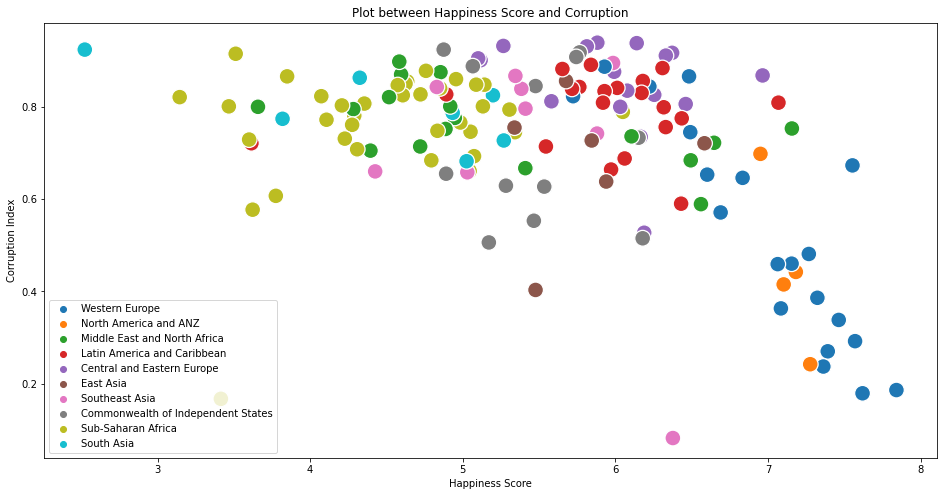

In [53]:
plt.rcParams['figure.figsize']=(16,8)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s=250)
plt.title('Plot between Happiness Score and Corruption')
plt.legend(loc='lower left')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption Index')